#  DS3000A/9000A 

# Final Exam – Part 2 (60 pts)

### Student Name: David Tran
### Student ID: 251169871

## General
This part of the exam is **Open Book** and you will answer to the programming questions below on this Jupyter Notebook. You have **2 hours (3:00 pm - 5:00 pm)** to finish the exam and upload your notebook on OWL. 
* You **are allowed** to use any document and sources on your computer and look up documents on the internet. **You need to cite any code that you use if it is NOT from the course Labs or Tutorial examples**.
* You or **NOT allowed** to share documents, or communicate in any other way with people inside/outside of the exam room during the final. Using AI chatbots is **NOT allowed and will be counted as cheating or plagiarism**.
* All Figures should have a x-axis and y-axis label.
* Add as many cells as you want, whenever you need to. 
* To finish the exam in the alloted time, you will have to work efficiently. You need to submit the exam Jupyter Notebook by the **due date (Dec 12, 2023 at 5:00 pm)** on **OWL in the Assignments / Final Exam - Part 2** where you downloaded the Dataset and Jupyter Notebook. **Late submission will be scored with 0 pts, unless you have received special accommodations. To avoid technical difficulties, start your submission at latest five to ten minutes before the deadline. To be sure, you can also submit multiple versions - only the latest version will be graded. 

**Ensure that your code runs correctly by choosing "Kernel -> Restart and Run All" before submitting.**

### Additional Guidance

If at any point you are not sure about the answer, then *write your assumptions clearly in your exam and proceed according to those assumptions.*

Good luck!

In [1]:
## Preliminaries
### YOU MAY ADD ADDITIONAL IMPORTS IF YOU WISH
import matplotlib.pyplot as plt 
%matplotlib inline

import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score

import time


## Dataset
In this exam, we will work on the network anomaly detection dataset "IP_Activity_Dataset_5000.csv". It was generated from web server access logs and collected from a real-world website in Content Delivery Networks (CDNs). Each sample/row in the dataset represents a unique Internet Protocol (IP) address with 9 columns/variables. Each feature/column is a performance indicator that reflect the state or activity of each sample/IP. The IP addresses were masked due to privacy reasons.  

### Variables/Features
Feature description: 
1.	**requests**: the number of requests sent by per IP.
2.	**request-interval**:  the average time interval between consecutive requests sent by per IP. Unit: milliseconds
3.	**request-popularity**: what percentage of the requests sent by per IP are for popular contents.
4.	**bytes**: the average bytes received by per IP after requesting the content.
5.	**delivery-time**: the average request delivery time experienced by per IP. Unit: milliseconds
6.	**hit-rate**: cache hit rate of per IP.
7.	**nodes**: the number of nodes that received requests from per IP.
8.	**contents**: the number of contents/files that per IP requested for.
9.	**label**: 0-normal, 1-abnormal (potential cache pollution attacks). 

---
# Question 1 - Explore dataset ( X / 5 pts )

- Read the dataset "IP_Activity_Dataset_5000.csv" as a pandas dataframe.
- Print the number of observations in the dataset
- Print the number of variables in the dataset (all variables regardless of whether they are a feature or label or neither)
- Print the number of observations for each class in the 'label' variable
- Print the first five rows of the dataset

In [2]:
df = pd.read_csv('IP_Activity_Dataset_5000.csv')
print('num observations', df.shape[0])
print('num variables', df.shape[1])x
print(df['label'].value_counts())
df.head()


num observations 5000
num variables 9
label
0    4500
1     500
Name: count, dtype: int64


,requests,request-interval,request-popularity,bytes,delivery-time,hit-rate,nodes,contents,label
0,18,378.605278,1.000000,29.667209,38.833333,0.888889,2,9,0
1,5,0.524200,1.000000,19.226953,204.600000,1.000000,1,5,0
2,1141,66.912231,0.167647,19.847204,142.072963,0.021520,5,703,1
3,80,2.472875,0.418750,1769.312634,1330.787500,1.000000,2,76,0
4,1,0.000000,1.000000,0.000000,2.000000,1.000000,1,1,0


---
---
# Question 2 - Regression and Evaluation (X / 20 pts)
Your next task is to build regression models that predicts the delivery-time of IPs.

---
## Question 2 Part A - Data Splitting For Regression ( X / 2 pts )
- Use 'delivery-time' as the target variable y for your regression models, and other variables as the feature set X.
- Split the data into equals-sized training and test sets (do not shuffle the data).


In [3]:
X = df.drop(['delivery-time'], axis=1).copy()
y = df['delivery-time'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

---
## Question 2 Part B - Data Standardization ( X / 2 pts )
- Z-standarize the input features of the training and test sets.
- All the questions below should be based on the standarized dataset.

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


---
## Question 2 Part C - Basic Lasso Regression ( X / 4 pts )
- Build a regression model with L1 regularization (Lasso) and the default alpha value. Fit it on your training set, and set the random state to 42.
- Report the coefficients and intercept of the model.
- Report the Root Mean Square Error (RMSE) to evaluate the testing performance of your model.

In [5]:
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train, y_train)

print(f'coeffs: {lasso_model.coef_}')
print(f'intercept: {lasso_model.intercept_}')
print(f'rsme: {mean_squared_error(y_test, lasso_model.predict(X_test), squared=False)}')


coeffs: [  10.17733701   18.59594951  103.74664627 5222.06671709 -138.53886518
  -26.9272339   328.28445291 -528.78077484]
intercept: 522.2855513716036
rsme: 2342.731628197048


---
## Question 2 Part D - Determine the Optimal Regularization Term ( X / 12 pts )
- Perform Lasso Regression with 5-fold cross-validation on the training set to find and **print out** the optimal regularization parameter (alpha) value. Vary the regularization parameter (alpha) between 0.01 and 100, evenly spaced in log-space, and generate 100 values. Set the random state to 42. Tip: use LassoCV function.
- Create a plot showing the relationship between these 100 alpha values and their corresponding mean RMSE values. Sets the scale of the x-axis to a logarithmic scale. 
- Build and fit a Lasso Regression model on the training set using the optimal alpha and a random state of 42. Report the coefficients and intercept of the model. Report the Root Mean Square Error (RMSE) to evaluate the testing performance of your model.

optimal alpha: 8.111308307896872


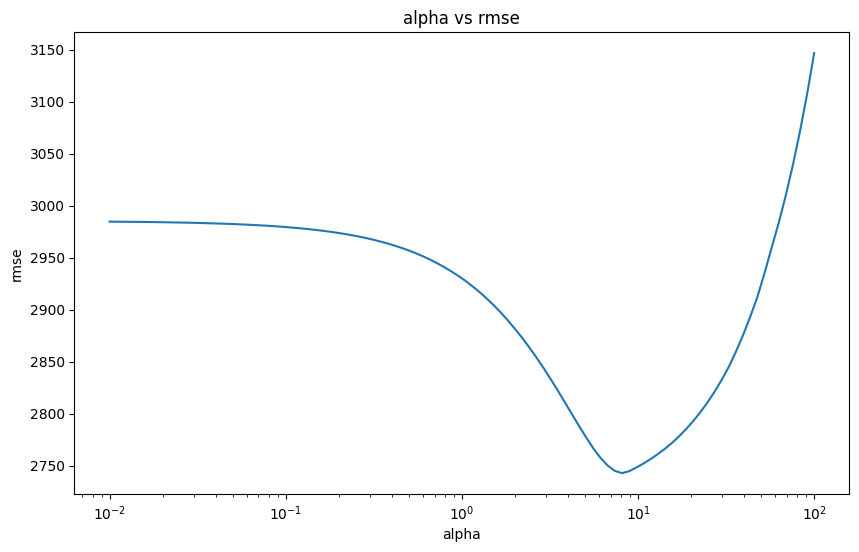

coeffs: [ 0.00000000e+00  9.80979380e+00  8.45399253e+01  5.21093772e+03
 -1.12052875e+02 -4.86181219e+00  3.09342072e+02 -5.16502916e+02]
intercept: 522.2855513716036
rmse: 2341.00895021364


In [6]:
alphas = np.logspace(-2, 2, num=100)
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

optimal_alpha = lasso_cv.alpha_
print(f'optimal alpha: {optimal_alpha}')

plt.figure(figsize=(10, 6))
plt.plot(lasso_cv.alphas_, np.sqrt(np.mean(lasso_cv.mse_path_, axis=1)))
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('rmse')
plt.title('alpha vs rmse')
plt.show()

lasso_model = Lasso(alpha=optimal_alpha, random_state=42)
lasso_model.fit(X_train, y_train)
print(f'coeffs: {lasso_model.coef_}')
print(f'intercept: {lasso_model.intercept_}')
print(f'rmse: {mean_squared_error(y_test, lasso_model.predict(X_test), squared=False)}')



---
---
# Question 3 - Classification and Evaluation (X / 35 pts)
Your next task is to build classification models that can identify the malicious attacker IPs.

---
## Question 3 Part A - Data Splitting For Classification ( X / 2 pts )
- Use 'label' as the target variable y for your classification models for abnormal IP detection, and other variables as the feature set X.
- Split the data into equals-sized training and test sets, and ensure the balanced distribution of labels when splitting data.

In [7]:
y = df['label'].copy()
X = df.drop(['label'], axis=1).copy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)


---
## Question 3 Part B - Data Standardization ( X / 2 pts )
- Z-standarize the input features of the training and test sets.
- All the questions below should be based on the standarized dataset.

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


---
## Question 3 Part C - Random Forest ( X / 5 pts )
- Build a Random Forest model that consists of 5 base decision trees with the maximum depth of 5, and fit the training set. Set random state to 42.
- Print out the accuracy, F1-score, confusion matrix, and execution time (including both training and testing time) of the model when evaluating the testing performance of your model.


In [9]:
def train_random_forest(X_train, X_test, model=None):
    if model == None:
        random_forest_model = RandomForestClassifier(n_estimators=5, max_depth=5, random_state=42)
    else:
        random_forest_model = model
    start_time = time.time()
    random_forest_model.fit(X_train, y_train)
    print(f'accuracy: {accuracy_score(y_test, random_forest_model.predict(X_test))}')
    print(f'f1 score: {f1_score(y_test, random_forest_model.predict(X_test))}')
    print(f'confusion matrix {confusion_matrix(y_test, random_forest_model.predict(X_test))}')
    print(f'execution time: {time.time() - start_time} seconds')

    return random_forest_model

random_forest_model = train_random_forest(X_train, X_test)


accuracy: 0.9916
f1 score: 0.9568788501026694
confusion matrix [[2246    4]
 [  17  233]]
execution time: 0.04093623161315918 seconds


---
## Question 3 Part D - Feature Selection by Random Forest ( X / 14 pts )
- Use the Random Forest model you built in Q3-C to generate feature importance scores and select the most important features (rank the importance scores of each feature in descending order, and only select the important features from most to least important until the accumulated relative importance score reaches 90% or 0.9).
- Use a horizontal bar chart to plot the importance scores of all features in descending order. Add appropriate x-axis and y-axis labels.
- Print out the selected features with their importance scores, and generate the new training and test sets with the new feature set. 
- Retrain the same Random Forest model from Q3-C on the new training set, and print out the accuracy, F1-score, confusion matrix, and execution time (including both training and testing time) of the model on the new test set.
- Plot the ROC curve for evaluating the Random Forest model on the new test set and report the area under the ROC curve.

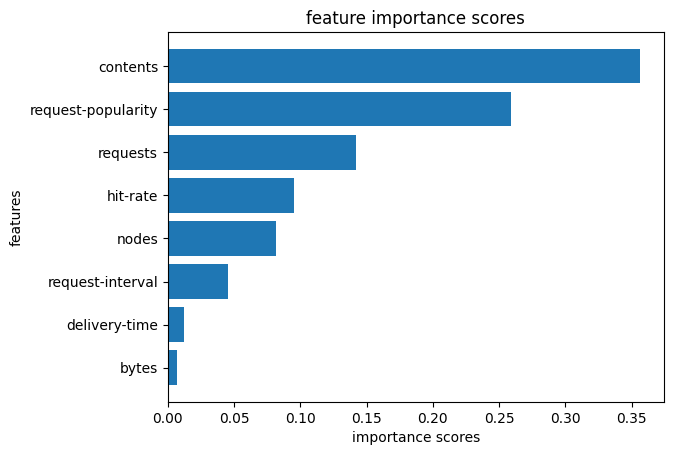

selected features
contents: 0.3565116220410234
request-popularity: 0.25924948917999363
requests: 0.14177658110104274
hit-rate: 0.09560544806422985
accuracy: 0.9956
f1 score: 0.9779559118236472
confusion matrix [[2245    5]
 [   6  244]]
execution time: 0.01112985610961914 seconds


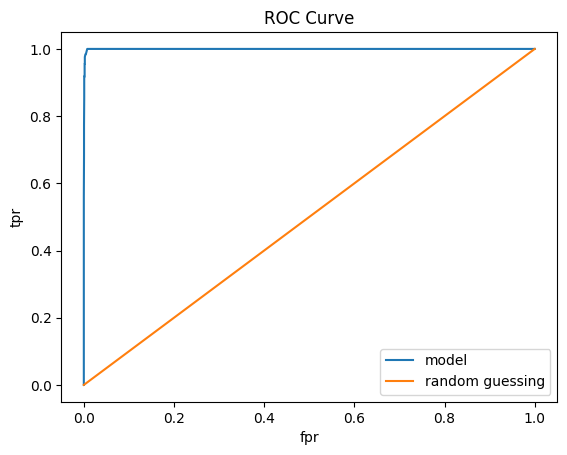

auc: 0.9995911111111111


In [10]:
sorted_indices = np.argsort(random_forest_model.feature_importances_)[::-1]
feature_importances = random_forest_model.feature_importances_[sorted_indices]
feature_names = X.columns[sorted_indices]

# descending order => highest importance at the top of the bar chart
plt.barh(feature_names[::-1], feature_importances[::-1])
plt.xlabel('importance scores')
plt.ylabel('features')
plt.title('feature importance scores')
plt.show()


accumulated_importance = np.cumsum(feature_importances)

selected_features = feature_names[accumulated_importance <= 0.9]
selected_importance_scores = feature_importances[accumulated_importance <= 0.9]

print(f'selected features')
for feature, score in zip(selected_features, selected_importance_scores):
    print(f'{feature}: {score}')

X_train_selected = X_train[:, accumulated_importance <= 0.9]
X_test_selected = X_test[:, accumulated_importance <= 0.9]

random_forest_model_selected = train_random_forest(X_train_selected, X_test_selected)

fpr, tpr, thresholds = roc_curve(y_test, random_forest_model_selected.predict_proba(X_test_selected)[:, 1])
auc = roc_auc_score(y_test, random_forest_model_selected.predict_proba(X_test_selected)[:, 1])

plt.plot(fpr, tpr, label='model')
plt.plot([0, 1], [0, 1], label='random guessing')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f'auc: {auc}')




---
## Question 3 Part E - Hyperparamete Tuning of Random Forest ( X / 8 pts )
- Use 3-fold grid search to tune two hyperparameters for the Random Forest model you built in Q3-D:
    - The number of base estimators/decision trees (find the better value among the two numbers 10 and 20).
    - The maximum tree depth (find the better value among the two numbers 10 and 20).
- Print out the detected better hyperparameter values and cross-validation score.
- Build the Random Forest model with the better hyperparameter values you found, and fit the new training set from Q3-D.
- Report the accuracy, F1-score. confusion matrix, and execution time (including both training and testing time) of the model when evaluating the testing performance of your model on the new test set from Q3-D.


In [11]:
params = dict({
    'n_estimators': [10, 20],
    'max_depth': [10, 20]
})

gs = GridSearchCV(
    random_forest_model_selected,
    params,
    cv = 3,
    scoring = 'neg_root_mean_squared_error'
)

gs.fit(X_train, y_train)

tuned_n_estimators = gs.best_params_.get('n_estimators')
tuned_max_depth = gs.best_params_.get('max_depth')

print(f'better n_estimators: {tuned_n_estimators}')
print(f'better max_depth: {tuned_max_depth}')
print(f'cv score: {gs.best_score_}')

tuned_forest = RandomForestClassifier(n_estimators=tuned_n_estimators, max_depth=tuned_max_depth, random_state=42)
train_random_forest(X_train_selected, X_test_selected, tuned_forest)


better n_estimators: 10
better max_depth: 10
cv score: -0.05370064243829587
accuracy: 0.994
f1 score: 0.969574036511156
confusion matrix [[2246    4]
 [  11  239]]
execution time: 0.017404794692993164 seconds


RandomForestClassifier(max_depth=10, n_estimators=10, random_state=42)

---
## Question 3 Part F - Classification Model Performance Discussion ( X / 4 pts )
- Compare the performance of the three models from Questions 3-C, 3-D, and 3-E, and discuss reasons for performance difference.
- Compare the execution time of the three models from Questions 3-C, 3-D, and 3-E, and discuss reasons for time/efficiency difference.

The following data is from one run of the notebook: the code is the same but values may slightly differ since they differ slightly between runs: the general trends should be the same, however.

### 3C model (untuned random forest, no feature selection)
```
accuracy: 0.9916
f1 score: 0.9568788501026694
confusion matrix [[2246    4]
 [  17  233]]
execution time: 0.04810023307800293 seconds
```

### 3D model (untuned random forest, feature selection)

```
accuracy: 0.9956
f1 score: 0.9779559118236472
confusion matrix [[2245    5]
 [   6  244]]
execution time: 0.013292074203491211 seconds
```

### 3E model (tuned random forest, feature selection)

```
accuracy: 0.994
f1 score: 0.969574036511156
confusion matrix [[2246    4]
 [  11  239]]
execution time: 0.01780223846435547 seconds
```



#### Written answer: Explain here.
The performance of all models is quite good. As expected, the untuned random forest with no feature selection performs the worst (lowest accuracy and f1 scores). Both models with feature selection perform better. The fact that feature selection performs better than no feature selection could suggest that the features of low importance are not very good predictors of the target variable: including them in the model (as in 3C) may cause the model to fit to the noise, resulting in lower performance.

3E technically performs slightly worse than the 3D model despite being hyperparameter tuned. But, the difference is extremely small (~.1% accuracy) that it could be considered negligible. Maybe (or maybe not), the 3E model actually generalizes better, and had we had a larger test set we would see 3E winning. It could also be performing slightly worse because despite our hyperparemeter tuning, having a max depth of 10 instead of 5 could be causing overfitting to the training data.

#### Written answer: Explain here.

The 3C model expectedly takes the longest to run: we are training with all the features, so during training the model considers all features when making a branch point, resulting in higher training time.

The 3E model takes longer than the 3D model, it uses 10 estimators and a max depth of 10 instead of 5 and 5, respectively. So, there are trees to train AND each tree is trained to a deeper level.

The 3D model is is the fastest because it uses less features, less estimators, and a shallower max depth.

---
---
---
**You're done! As always, double-check your work by re-running the notebook from scratch.**